<a href="https://colab.research.google.com/github/Pdugovich/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/module3-databackedassertions/LS_DS_113_Making_Data_backed_Assertions_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science - Making Data-backed Assertions

This is, for many, the main point of data science - to create and support reasoned arguments based on evidence. It's not a topic to master in a day, but it is worth some focused time thinking about and structuring your approach to it.

## Assignment - what's going on here?

Consider the data in `persons.csv` (already prepared for you, in the repo for the week). It has four columns - a unique id, followed by age (in years), weight (in lbs), and exercise time (in minutes/week) of 1200 (hypothetical) people.

Try to figure out which variables are possibly related to each other, and which may be confounding relationships.

Try and isolate the main relationships and then communicate them using crosstabs and graphs. Share any cool graphs that you make with the rest of the class in Slack!

In [0]:
import pandas as pd
!pip install pandas==0.23.4
df = pd.read_csv('https://raw.githubusercontent.com/LambdaSchool/DS-Unit-1-Sprint-1-Dealing-With-Data/master/module3-databackedassertions/persons.csv')

In [0]:
df.drop(df.columns[0],axis=1,inplace=True)
#dropping the first column

Text(0.5, 1.0, 'Weight at Age and Exercise per Week')

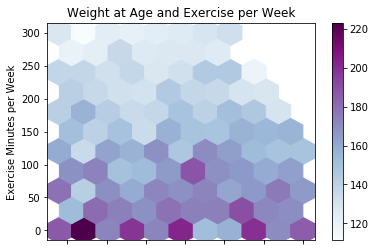

In [149]:
#graphing the uncut data in a hexbin yielded the most 
df_plot = df.plot.hexbin('age','exercise_time','weight',gridsize=10,cmap='BuPu')
df_plot.set_xlabel('Age')
df_plot.set_ylabel('Exercise Minutes per Week')
df_plot.set_title('Weight at Age and Exercise per Week')

In [0]:
#Cutting columns into managable bins for graphing
age_bins = pd.cut(df.age,2)
weight_bins = pd.cut(df.weight,2)
exercise_bins = pd.cut(df.exercise_time,2)

Text(0.5, 1.0, 'Weight at Age and Exercise per Week')

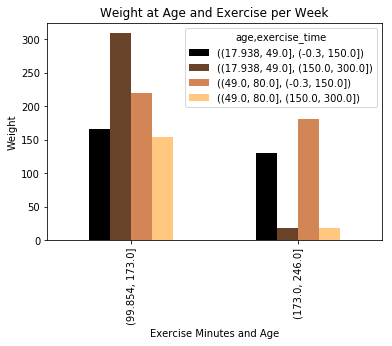

In [137]:
crosstab = pd.crosstab(weight_bins,[age_bins,exercise_bins])
ct_plot = crosstab.plot(kind='bar',cmap='copper')
ct_plot.set_xlabel('Exercise Minutes and Age')
ct_plot.set_ylabel('Weight')
ct_plot.set_title('Weight at Age and Exercise per Week')
#This is the most digestible graph I found I could make utilizing crosstab.
#Any additional bins made the graph unreadable

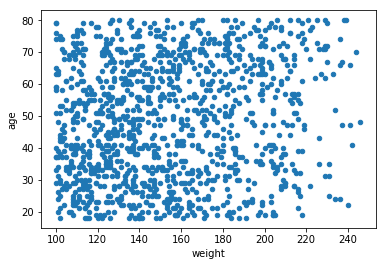

In [133]:
df.plot.scatter('weight','age')

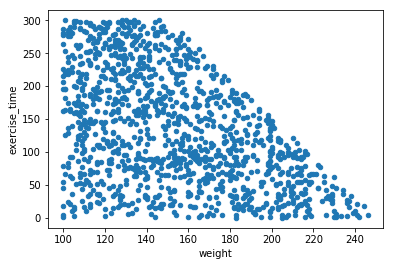

In [138]:
df.plot.scatter('weight','exercise_time')

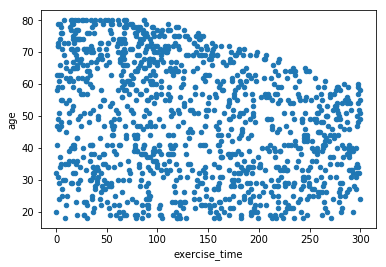

In [139]:
df.plot.scatter('exercise_time','age')

In [143]:
df.describe()
#double checking that there is no value lower than 0 for exercise time

,age,weight,exercise_time
count,1200.000000,1200.000000,1200.000000
mean,48.396667,153.540833,134.910833
std,18.166802,35.132182,85.548895
min,18.000000,100.000000,0.000000
25%,33.000000,125.000000,65.000000
50%,48.000000,149.000000,122.000000
75%,64.000000,180.250000,206.000000
max,80.000000,246.000000,300.000000


### Assignment questions

After you've worked on some code, answer the following questions in this text block:

1.  What are the variable types in the data?
>The variables are all discrete. I'm not sure why that -0.3 exercise time is showing up on the graph, but I checked over the raw data and there are certainly no decimals or negatives in the file.


2.  What are the relationships between the variables?
>It looks like weight is negatively correlated with minutes of exercise per week, unsurprisingly.
3.  Which relationships are "real", and which spurious?
>There is a clear negative correlation between exercise and weight which makes sense. For age and exercise, there seems to be a ceiling where people over a certain age just aren't able to work out over a certain number of minutes. That's a little strange. There doesn't seem to be a relationship between age and weight.


## Stretch goals and resources

Following are *optional* things for you to take a look at. Focus on the above assignment first, and make sure to commit and push your changes to GitHub.

- [Spurious Correlations](http://tylervigen.com/spurious-correlations)
- [NIH on controlling for confounding variables](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4017459/)

Stretch goals:

- Produce your own plot inspired by the Spurious Correlation visualizations (and consider writing a blog post about it - both the content and how you made it)
- Pick one of the techniques that NIH highlights for confounding variables - we'll be going into many of them later, but see if you can find which Python modules may help (hint - check scikit-learn)